# Stage 1

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [15]:
df = df.rename(columns={'Employment Type': 'EmploymentType'})

In [16]:
df.head()

,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   EmploymentType       1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [7]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [8]:
cat = ['EmploymentType', 'GraduateOrNot','FrequentFlyer', 'EverTravelledAbroad']

In [9]:
df[cat].describe()

,EmploymentType,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


**Observasi**
* Terdapat 1987 entries dan 10 feature
* Terdapat satu feature yaitu Unnamed: 0 yang nanti akan di drop karena hanya representasi index
* Tidak ada feature yang isinya bermasalah dilihat dari statistik deskriptif
* Feature ChronicDiseases dan TravelInsurance merupakan feature kategorikal binary

**UNIVARIATE ANALYSIS: CATEGORICAL**

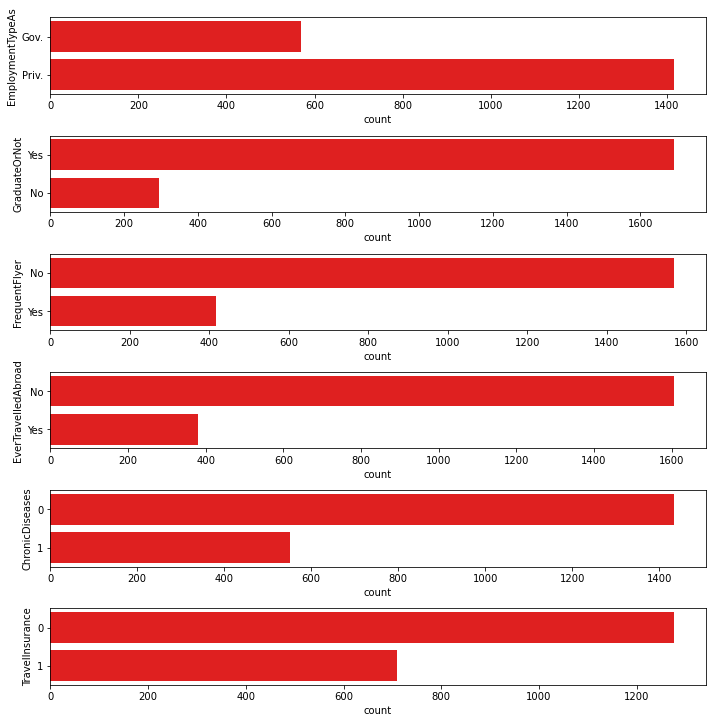

In [10]:
df['EmploymentTypeAs']=df['EmploymentType'].map({'Private Sector/Self Employed':'Priv.','Government Sector':'Gov.'})
cats = ['EmploymentTypeAs','GraduateOrNot','FrequentFlyer','EverTravelledAbroad','ChronicDiseases','TravelInsurance']
plt.figure(figsize=(10,10))
for i in range(0, len(cats)):
    plt.subplot(len(cats), 1,i+1)
    sns.countplot(y=df[cats[i]], color='red')
    plt.tight_layout()
    

In [11]:
print(df['EmploymentType'].value_counts())
print(df['GraduateOrNot'].value_counts()) 
print(df['ChronicDiseases'].value_counts())
print(df['FrequentFlyer'].value_counts())
print(df['EverTravelledAbroad'].value_counts())
print(df['TravelInsurance'].value_counts())

Private Sector/Self Employed    1417
Government Sector                570
Name: EmploymentType, dtype: int64
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64
0    1435
1     552
Name: ChronicDiseases, dtype: int64
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64
0    1277
1     710
Name: TravelInsurance, dtype: int64


In [12]:
df.drop(columns=["EmploymentTypeAs"], inplace=True)

**UNIVARIATE ANALYSIS: NUMERICAL**

In [13]:
num = ['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers']

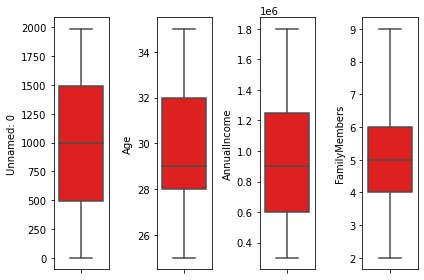

In [14]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='red', orient='v')
    plt.tight_layout()

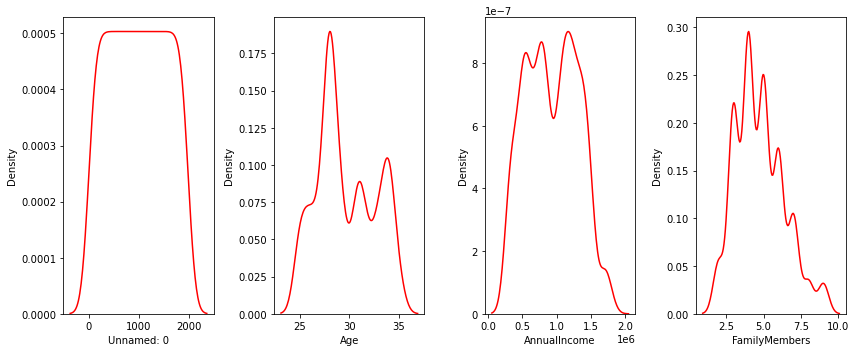

In [15]:
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.kdeplot(x=df[num[i]], color='red')
    plt.xlabel(num[i])
    plt.tight_layout()

In [16]:
print(df['AnnualIncome'].mode())
print(df['FamilyMembers'].mode())
print(df['Age'].mode())

0    800000
dtype: int64
0    4
dtype: int64
0    28
dtype: int64


**BIVARIATE ANALYSIS: CATEGORICAL**

In [17]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100* a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.05
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage,(x, y), size = 12)

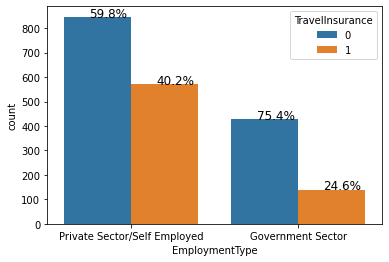

In [18]:
ax = sns.countplot(x = 'EmploymentType',hue='TravelInsurance',data=df, order=['Private Sector/Self Employed','Government Sector'])
with_hue(ax,df.EmploymentType,2,2)
plt.show()

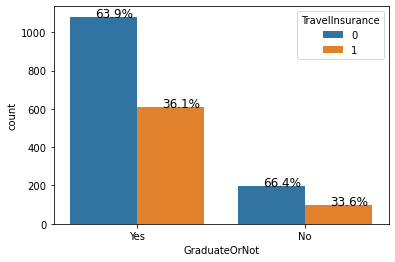

In [19]:
ax = sns.countplot(x='GraduateOrNot',hue='TravelInsurance',data=df)
with_hue(ax,df.GraduateOrNot,2,2)
plt.show()

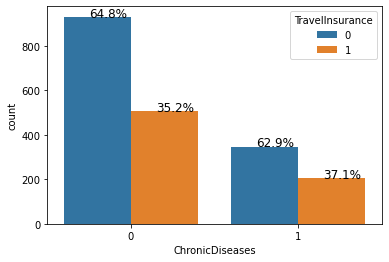

In [20]:
ax = sns.countplot(x='ChronicDiseases',hue='TravelInsurance',data=df)
with_hue(ax,df.ChronicDiseases,2,2)
plt.show()

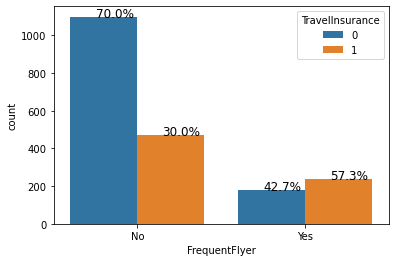

In [21]:
ax = sns.countplot(x='FrequentFlyer',hue='TravelInsurance',data=df)
with_hue(ax,df.FrequentFlyer,2,2)
plt.show()

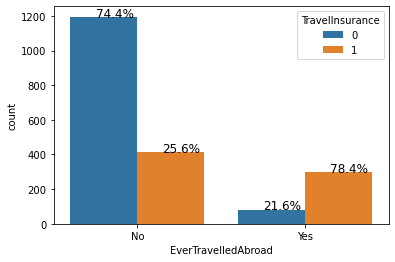

In [22]:
ax = sns.countplot(x='EverTravelledAbroad',hue='TravelInsurance',data=df)
with_hue(ax,df.EverTravelledAbroad,2,2)
plt.show()

**BIVARIATE ANALYSIS: NUMERICAL**

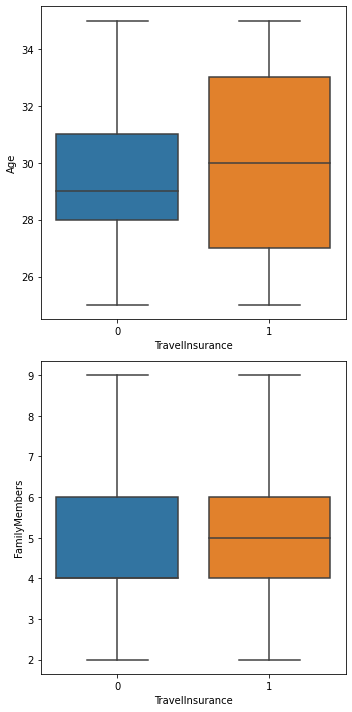

In [23]:
featnum = ['Age','FamilyMembers']
plt.figure(figsize=(5,10))
for i in range(0, len(featnum)):
    plt.subplot(len(featnum),1, i+1)
    sns.boxplot(y=df[featnum[i]], orient='v', x= df['TravelInsurance'])
    plt.tight_layout()

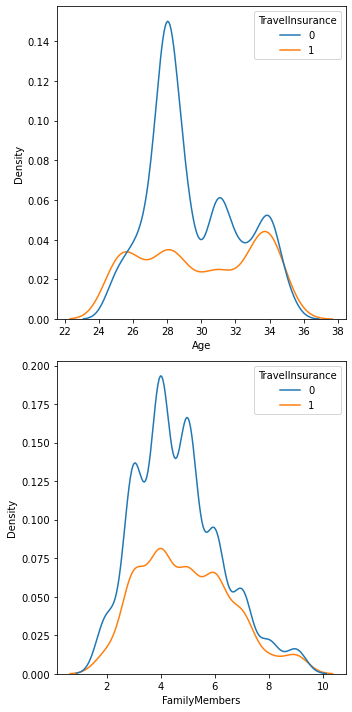

In [24]:
plt.figure(figsize=(5,10))
for i in range(0, len(featnum)):
    plt.subplot(len(featnum),1, i+1)
    sns.kdeplot(x=df[featnum[i]], hue= df['TravelInsurance'])
    plt.tight_layout()

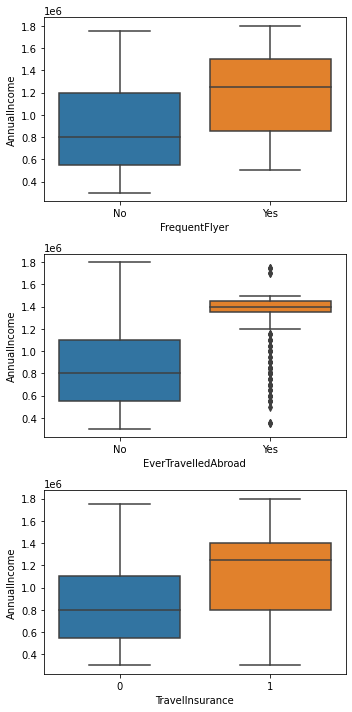

In [25]:
feat = ['FrequentFlyer','EverTravelledAbroad','TravelInsurance']
plt.figure(figsize=(5,10))
for i in range(0, len(feat)):
    plt.subplot(len(feat),1, i+1)
    sns.boxplot(x=df[feat[i]], orient='v', y= df['AnnualIncome'])
    plt.tight_layout()

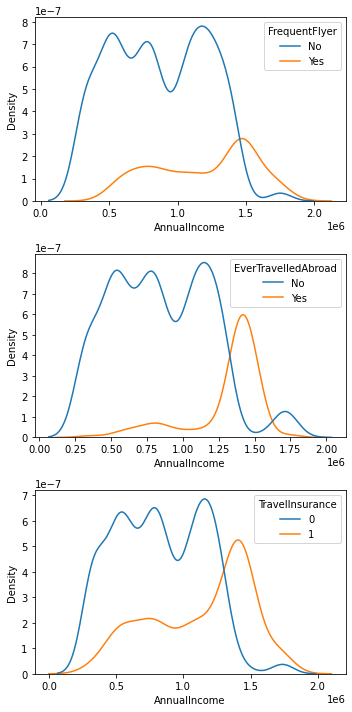

In [26]:
plt.figure(figsize=(5,10))
for i in range(0, len(feat)):
    plt.subplot(len(feat),1, i+1)
    sns.kdeplot(hue=df[feat[i]], x= df['AnnualIncome'])
    plt.tight_layout()

<AxesSubplot:>

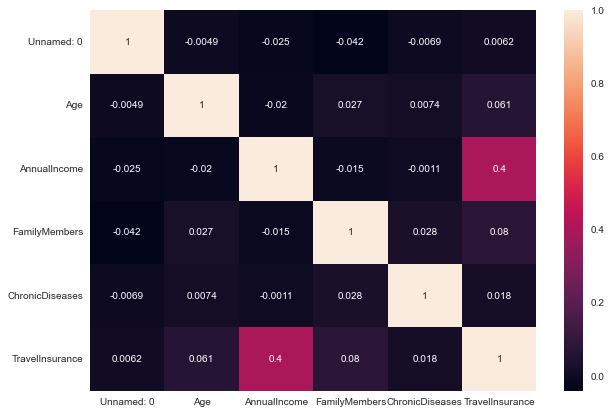

In [137]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

Dari komparasi di atas, dapat diketahui bahwa kecenderungan untuk membeli travel insurance dipengaruhi oleh pendapatan per tahun. dimana semakin tinggi pendapatan seseorang, maka orang tersebut akan cenderung membeli travel insurance. Orang-orang dengan gaji tinggi ini juga cenderung untuk lebih sering terbang, terutama ke luar negeri.
Terdapat kemungkinan lain, yaitu bisa saja harga travel insurance mahal, sehingga hanya orang-orang dengan nilai pendapatan tinggi yang mampu membeli.

Dari bivariate analysis ada beberapa insight yang dapat diambil, yaitu:
* Pada fitur **EmploymentType**, diketahui bahwa orang-orang yang lebih banyak membeli travel insurance adalah orang-orang yang bekerja pada Private Sector/Self Employed, berjumlah hampir 50% dari total populasi pada sektor tersebut. Sedangkan pada Government Sector, pembeli hanya sekitar 20% dari total populasi. Ini mungkin dipengaruhi oleh jumlah orang dengan pendapatan pertahun pada tiap kategori, dimana pada kategori Government Sector, populasi dengan pendapatan tinggi cenderung sedikit.
* Pada fitur **GraduateOrNot**, diketahui bahwa orang-orang yang lebih banyak membeli travel insurance adalah orang-orang yang punya background pendidikan. Namun, secara presentase, kedua kategori tersebut memiliki pembagian presentasi yang relatif sama antara pembeli dan non-pembeli dimana non-pembeli lebih banyak dari pembeli.
* Pada fitur **ChronicDiseases**, diketahui bahwa orang-orang yang lebih banyak membeli travel insurance adalah orang-orang yang tidak memiliki penyakit kronis. Sedangkan secara presentase, orang-orang dengan penyakit kronis cenderung punya kesadaran untuk membeli travel insurance meskipun tidak signifikan dilihat dari selisih antara pembeli dan non-pembeli pada kedua kategori.
* Pada fitur **FrequentFlyer**, diketahui bahwa orang-orang yang lebih banyak membeli travel insurance adalah orang-orang yang jarang melakukan perjalanan dengan transportasi udara. Namun, presentasenya hanya 30% dari total populasi pada kategori tersebut. Sedangkan orang-orang yang sering menggunakan transportasi udara cenderung punya kesadaran akan resiko yang diterima sehingga membeli travel insurance dilihat dari presentase pembeli yang lebih tinggi pada kategori tersebut.
* Pada fitur **EverTravelledAbroad**, diketahui bahwa orang-orang yang lebih banyak membeli travel insurance adalah orang-orang yang tidak berpergian ke luar negeri / menggunakan transportasi udara kelas domestik. Namun, pembeli hanya sekitar 25% dari total populasi pada kategori tersebut. Ini mungkin karena penerbangan domestik dirasa lebih aman dan relatif lebih dekat sehingga tidak memerlukan asuransi. Sedangkan untuk orang-orang yang sering bepergian ke luar negeri / menggunakan kelas international, mereka cenderung untuk membeli travel insurance yang mungkin atas dasar faktor resiko penerbangan yang dirasa lebih besar karena jarak yang jauh dari tempat asal serta kemungkinan-kemungkinan tidak terduga selama di negara destinasi. 
* Pada fitur **Age**, diketahui orang-orang akan cenderung membeli travel insurance ketika sudah berumur 30 tahun ke atas. Sedangkan, pengguna transportasi terbanyak sekaligus tidak membeli travel insurance berumur 28 tahun.
* Pada fitur **FamilyMembers**, diketahui bahwa semakin banyak anggota keluarga, orang-orang akan cenderung untuk membeli travel insurance. Bisa jadi karena jika liburan bersama keluarga menggunakan transportasi penerbangan, faktor resiko akan semakin besar dan berlaku untuk semua penumpang. Kemungkinan lain adalah orang-orang dengan keluarga lebih dari 5 adalah keluarga yang sudah punya pilihan untuk membeli travel insurance berdasarkan regulasi umur, sedangkan pada keluarga kecil, ada anggota keluarga dibawah umur sehingga masuk dalam kategori infant.

Dari insgiht di atas, ada beberapa rekomendasi yang bisa diajukan, yaitu:
* Dengan asumsi harga travel insurance mahal, penerapan harga premi yang variatif dengan konsep level (silver,gold,platinum) bisa dilakukan untuk menjangkau pengguna transportasi udara dengan level finansial menengah-bawah.
* Promo early bird/first flight/one way flight untuk menjangkau orang-orang yang hanya sesekali menggunakan transportasi udara.
* Promo Productive Age untuk menjangkau penumpang yang umurnya relatif muda dengan asumsi banyak karyawan muda yang terkadang melakukan perjalanan dinas mewakili manager/perusahaan.
* Penerapan family package yang variatif.
* Penerapan paket domestik yang lebih simple, tidak sebanyak konten perlindungan pada paket international dan terjangkau
* Penerapan perlindungan kesehatan plus bagi yang memiliki riwayat penyakit kronis agar dapat penanganan khusus dan intensif.

# Stage 2

**EKSPLORASI ATTRIBUTE**

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   EmploymentType       1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


**CEK MISSING VALUES**

In [139]:
df.isna().sum()

Unnamed: 0             0
Age                    0
EmploymentType         0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

**CEK DATA DUPLIKAT**

In [140]:
df.duplicated().sum()

0

**CEK DATA BERMASALAH**

In [141]:
df.head()

,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [17]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [143]:
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


**HANDLING OUTLIER DATA**

In [4]:
num = ['Age', 'AnnualIncome', 'FamilyMembers','ChronicDiseases','TravelInsurance']
num_cat = ['EmploymentType', 'GraduateOrNot','FrequentFlyer', 'EverTravelledAbroad']

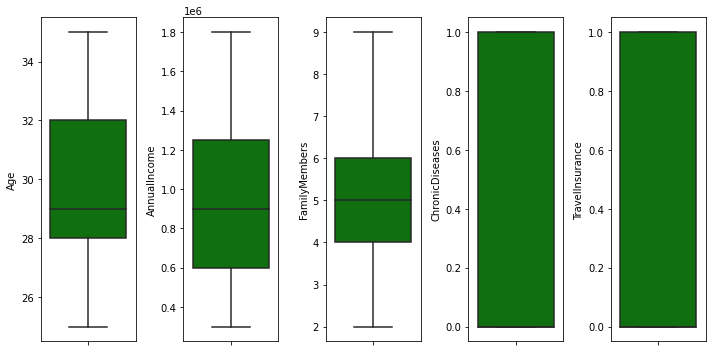

In [5]:
plt.figure(figsize=(10, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='green')
    plt.tight_layout()

**FEATURE TRANSFORMATION**

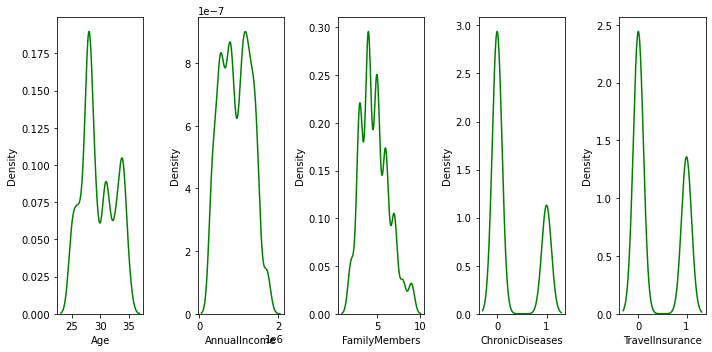

In [6]:
plt.figure(figsize=(10, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.kdeplot(x=df[num[i]], color='green')
    plt.tight_layout()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
# df['log_AI'] = np.log(df['AnnualIncome'])
# df['log_Age'] = np.log(df['Age'])
# df['log_FM'] = np.log(df['FamilyMembers'])

#Normalization
# df['Age_norm'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
# df['Annual_norm'] = MinMaxScaler().fit_transform(df['AnnualIncome'].values.reshape(len(df), 1))
# df['Family_norm'] = MinMaxScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df), 1))

#Standardization
# df['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
# df['Annual_std'] = StandardScaler().fit_transform(df['AnnualIncome'].values.reshape(len(df), 1))
# df['Family_std'] = StandardScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df), 1))

**FEATURE ENCODING**

In [18]:
df['EmploymentType']=df['EmploymentType'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'Yes':1,'No':0})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'Yes':1,'No':0})

In [149]:
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


**DROP KORELASI LEMAH**

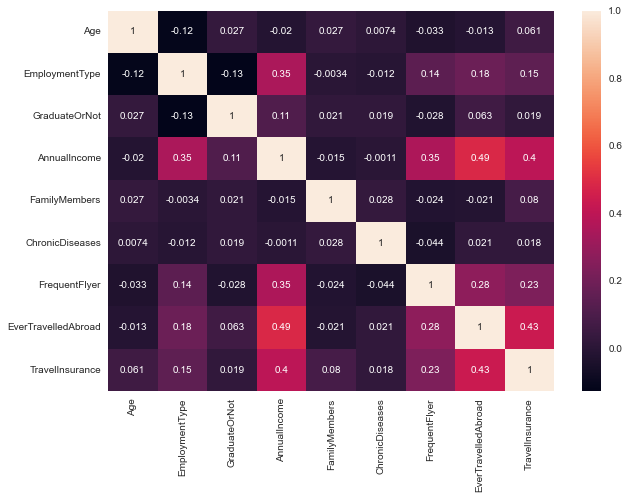

In [150]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
from scipy.stats import chi2_contingency 
age = df['Age']
et = df['EmploymentType']
gon = df['GraduateOrNot']
ai = df['AnnualIncome']
fm = df['FamilyMembers']
cd = df['ChronicDiseases']
ff = df['FrequentFlyer']
eta = df['EverTravelledAbroad']
ti = df['TravelInsurance']


In [17]:
table = pd.crosstab(ti,age)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats age %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,et)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats ET %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,gon)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats GON %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,ai)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats AI %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,fm)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats FM %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,cd)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats CD %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,ff)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats FF %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,eta)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats ETA %0.3f p_value %0.3f' % (chi2,p))

Chi-square stats age 186.880 p_value 0.000
Chi-square stats ET 42.754 p_value 0.000
Chi-square stats GON 0.606 p_value 0.436
Chi-square stats AI 638.646 p_value 0.000
Chi-square stats FM 29.115 p_value 0.000
Chi-square stats CD 0.575 p_value 0.448
Chi-square stats FF 105.857 p_value 0.000
Chi-square stats ETA 370.560 p_value 0.000


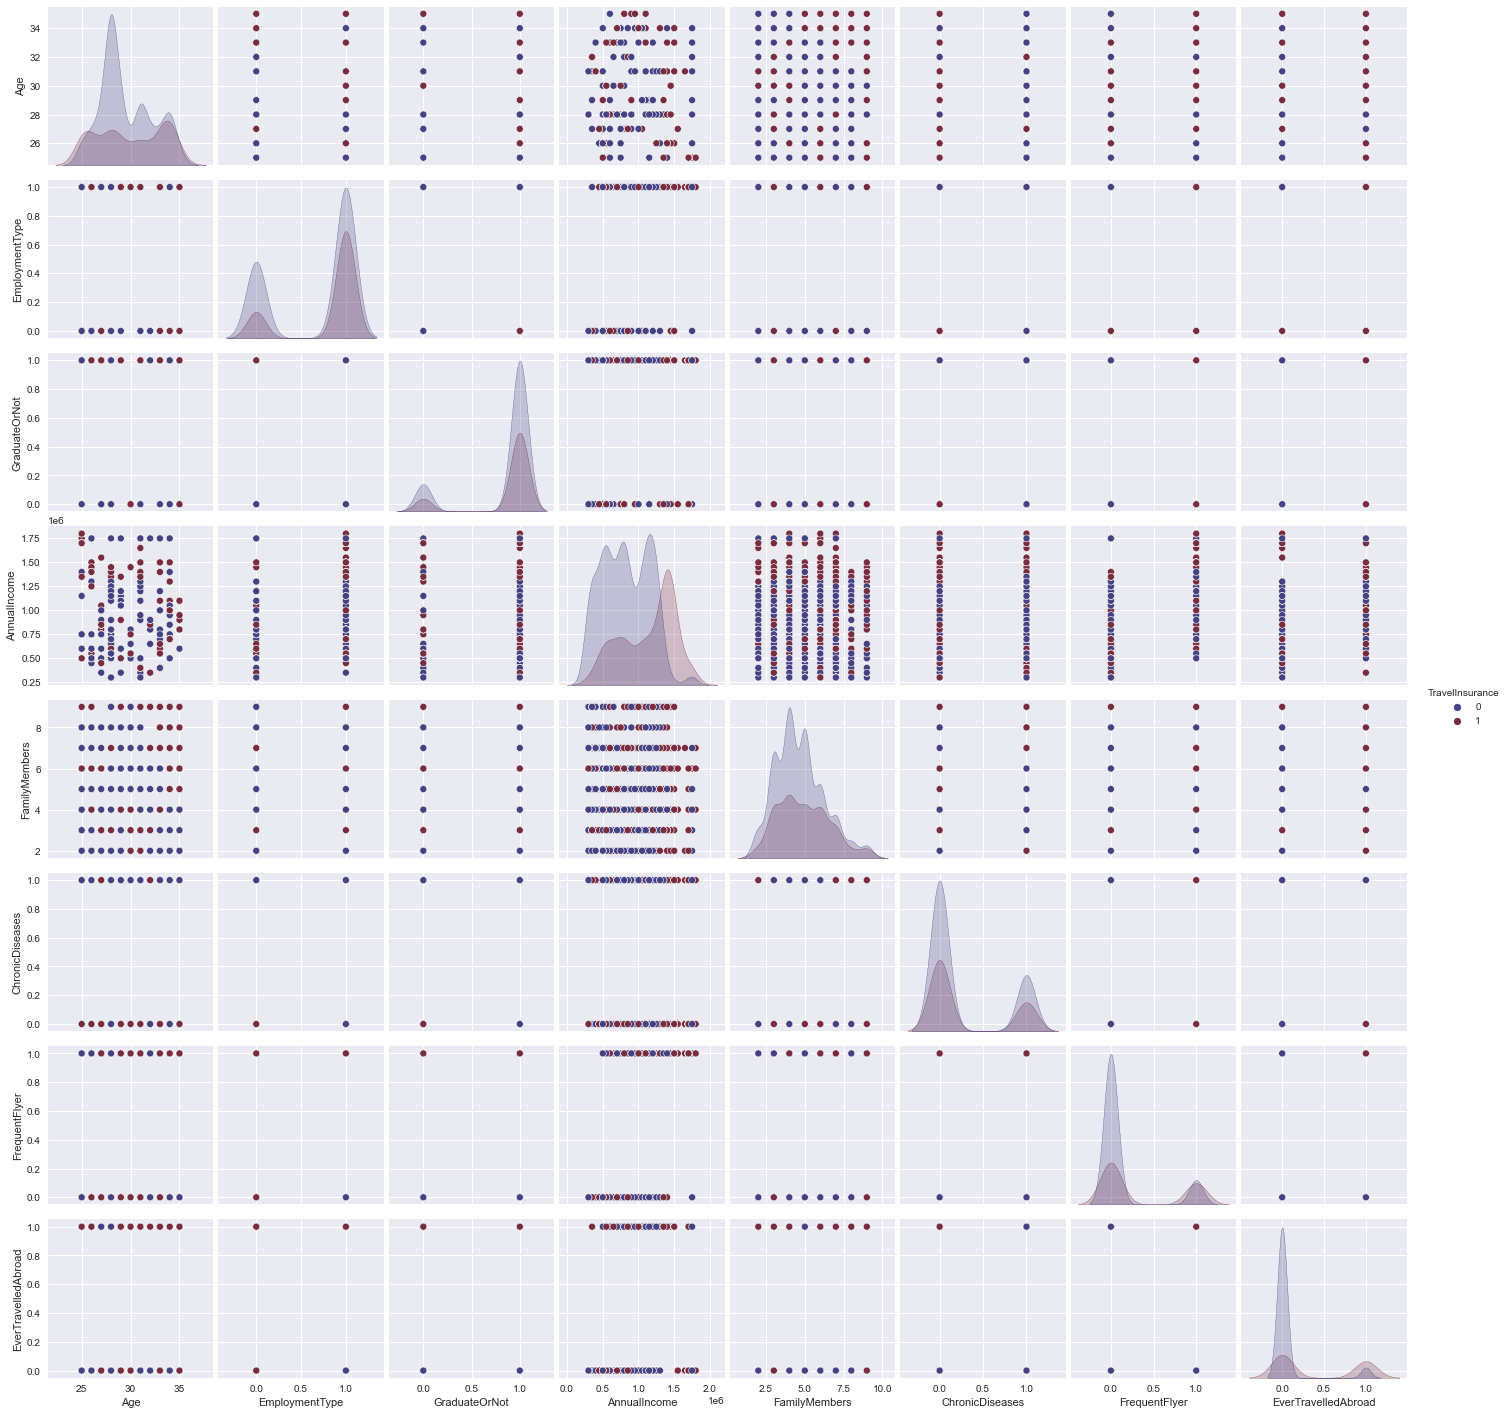

In [106]:
sns.pairplot(df,diag_kind='kde', hue ='TravelInsurance', palette ='icefire' )
plt.show()

In [151]:
df.drop(columns=['GraduateOrNot','ChronicDiseases'], inplace=True)
df.head()

,Age,EmploymentType,AnnualIncome,FamilyMembers,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,400000,6,0,0,0
1,31,1,1250000,7,0,0,0
2,34,1,500000,4,0,0,1
3,28,1,700000,3,0,0,0
4,28,1,700000,8,1,0,0


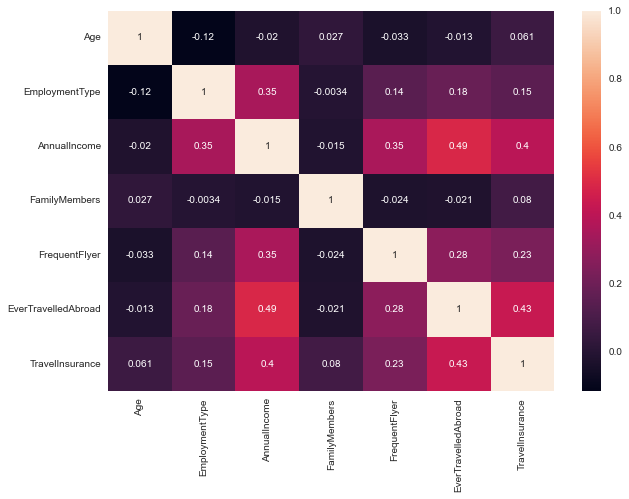

In [152]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

* **AnnualIncome dan Label Travel Insurance dengan nilai 0,40.**
* **EverTravelledAbroad dan Label Travel Insurance dengan nilai 0,43.**

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1987 non-null   int64
 1   EmploymentType       1987 non-null   int64
 2   AnnualIncome         1987 non-null   int64
 3   FamilyMembers        1987 non-null   int64
 4   FrequentFlyer        1987 non-null   int64
 5   EverTravelledAbroad  1987 non-null   int64
 6   TravelInsurance      1987 non-null   int64
dtypes: int64(7)
memory usage: 108.8 KB


**HANDLING IMBALANCED DATA**

In [143]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['TravelInsurance']]]
y = df['TravelInsurance']
print(X.shape)
print(y.shape)

(1987, 8)
(1987,)


In [144]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(1.0).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(1.0).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1.0).fit_resample(X, y)

C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [145]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    1277
1     710
Name: TravelInsurance, dtype: int64


UNDERSAMPLING
0    710
1    710
Name: TravelInsurance, dtype: int64


OVERSAMPLING
0    1277
1    1277
Name: TravelInsurance, dtype: int64


SMOTE
0    1277
1    1277
Name: TravelInsurance, dtype: int64


# Stage 3

In [37]:
df.columns

Index(['Age', 'EmploymentType', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [225]:
X = df[['Age', 'EmploymentType', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad']]
y = df['TravelInsurance']

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [227]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

**DECISION TREE**

Baseline

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
eval_classification(model)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.78
Recall (Test Set): 0.66
F1-Score (Test Set): 0.71
AUC (test-proba): 0.77
AUC (train-proba): 0.98


In [263]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9225928256765261
Test score:0.8115577889447236


In [264]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

max_depth = [25,50] # Maximum number of levels in tree
min_samples_split = [10,20,50] # Minimum number of samples required to split a node
min_samples_leaf = [20,25,50] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)
eval_classification_over(model)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.85
Recall (Test Set): 0.50
F1-Score (Test Set): 0.63
AUC (test-proba): 0.76
AUC (train-proba): 0.82


Feature Transformation

In [246]:
def eval_classification_std(model):
    y_pred = model.predict(X_test_std)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test_std)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
def eval_classification_scaled(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [247]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mscale=MinMaxScaler()
std=StandardScaler()
X_train_scaled = mscale.fit_transform(X_train)
X_test_scaled = mscale.transform(X_test)
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform (X_test)

In [248]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_std,y_train)
eval_classification_std(model)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.77
Recall (Test Set): 0.65
F1-Score (Test Set): 0.70
AUC (test-proba): 0.76
AUC (train-proba): 0.50


In [250]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


# List of hyperparameter
max_depth = [25,50] # Maximum number of levels in tree
min_samples_split = [10,20,30] # Minimum number of samples required to split a node
min_samples_leaf = [20,25,50] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train_std, y_train)
eval_classification_std(model)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.90
Recall (Test Set): 0.46
F1-Score (Test Set): 0.61
AUC (test-proba): 0.78
AUC (train-proba): 0.55


In [178]:
print('Train score: ' + str(model.score(X_train_scaled, y_train))) #accuracy
print('Test score:' + str(model.score(X_test_scaled, y_test))) #accuracy

Train score: 0.6654676258992805
Test score:0.6850921273031826


In [162]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled,y_train)
eval_classification_scaled(model)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.71
Recall (Test Set): 0.63
F1-Score (Test Set): 0.67
AUC (test-proba): 0.75
AUC (train-proba): 0.50


In [179]:
print('Train score: ' + str(model.score(X_train_std, y_train))) #accuracy
print('Test score:' + str(model.score(X_test_std, y_test))) #accuracy

Train score: 0.6654676258992805
Test score:0.6850921273031826


Imbalance

In [174]:
def eval_classification_under(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_under_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_under_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_under_train, y_pred_proba_train[:, 1]))

def eval_classification_over(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_train, y_pred_proba_train[:, 1]))

In [187]:
from imblearn import under_sampling, over_sampling
X_under_train, y_under_train = under_sampling.RandomUnderSampler(1.0).fit_resample(X_train, y_train)
X_over_train, y_over_train = over_sampling.RandomOverSampler(1.0).fit_resample(X_train, y_train)
X_over_SMOTE_train, y_over_SMOTE_train = over_sampling.SMOTE(1.0).fit_resample(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [188]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_under_train,y_under_train)

eval_classification_under(model)


Accuracy (Test Set): 0.73
Precision (Test Set): 0.60
Recall (Test Set): 0.68
F1-Score (Test Set): 0.64
AUC (test-proba): 0.72
AUC (train-proba): 0.99


In [189]:
print('Train score: ' + str(model.score(X_under_train, y_under_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9331337325349301
Test score:0.7286432160804021


In [190]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_over_train,y_over_train)

eval_classification_over(model)


Accuracy (Test Set): 0.75
Precision (Test Set): 0.64
Recall (Test Set): 0.66
F1-Score (Test Set): 0.65
AUC (test-proba): 0.76
AUC (train-proba): 0.99


In [191]:
print('Train score: ' + str(model.score(X_over_train, y_over_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9280089988751407
Test score:0.7520938023450586


In [257]:
# List of hyperparameter
max_depth = [25,50] # Maximum number of levels in tree
min_samples_split = [10,20,50] # Minimum number of samples required to split a node
min_samples_leaf = [20,25,50] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_over_train, y_over_train)
eval_classification_over(model)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.78
Recall (Test Set): 0.64
F1-Score (Test Set): 0.70
AUC (test-proba): 0.84
AUC (train-proba): 0.85


In [259]:
print('Train score: ' + str(model.score(X_over_train, y_over_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8447802197802198
Test score:0.7758620689655172


Feature Selection 

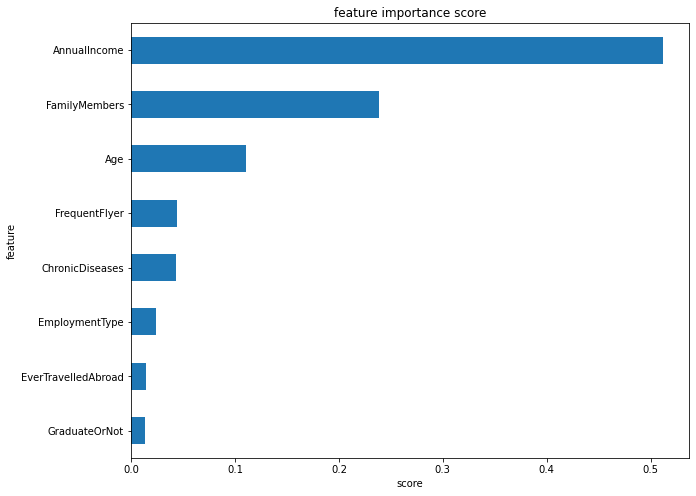

In [237]:
show_feature_importance(model)

In [238]:
X_train_dropped = X_train.drop(columns=['EverTravelledAbroad','GraduateOrNot','EmploymentType'])
X_test_dropped = X_test.drop(columns=['EverTravelledAbroad','GraduateOrNot','EmploymentType'])

In [239]:
def eval_classification_dropped(model):
    y_pred = model.predict(X_test_dropped)
    y_pred_train = model.predict(X_train_dropped)
    y_pred_proba = model.predict_proba(X_test_dropped)
    y_pred_proba_train = model.predict_proba(X_train_dropped)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [240]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_dropped,y_train)

eval_classification_dropped(model)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.81
Recall (Test Set): 0.63
F1-Score (Test Set): 0.71
AUC (test-proba): 0.77
AUC (train-proba): 0.98


In [134]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_over_train, y_over_train)

# Predict & Evaluation

eval_classification(model)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.67
Recall (Test Set): 0.62
F1-Score (Test Set): 0.64
AUC (test-proba): 0.78
AUC (train-proba): 0.82


In [141]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.3510791366906475
Test score:0.37185929648241206


In [258]:
show_best_hyperparameter(model)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 25, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
